In [1]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# pip install pandas

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from joblib import dump
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('C:/Users/saiak/Downloads/SDE_PROJECT/processed_cleveland.csv')
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
# Convert 'ca' and 'thal' columns to numeric, handling errors
df_train['ca'] = pd.to_numeric(df_train['ca'], errors='coerce')
df_train['thal'] = pd.to_numeric(df_train['thal'], errors='coerce')

# Handle missing values (replace NaN with mean or other strategies if needed)
df_train['ca'].fillna(df_train['ca'].mean(), inplace=True)
df_train['thal'].fillna(df_train['thal'].mean(), inplace=True)

# Now, check the data types to ensure they are numeric
print(df_train.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


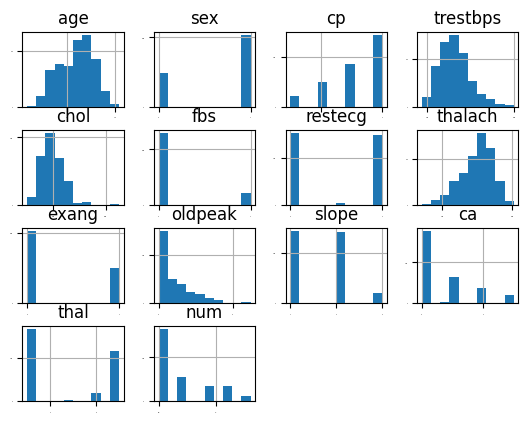

In [5]:
df_train.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [6]:
static_data, stream_data = train_test_split(df_train, test_size=0.2, random_state=42)
stream_data = stream_data.iloc[:, :-1]
stream_data.to_csv('stream_data2.csv')
static_data = static_data.reset_index(drop=True)
stream_data = stream_data.reset_index(drop=True)
df_train = static_data

In [7]:
from sklearn.linear_model import LogisticRegression
x, y = df_train.iloc[:, :-1].astype(float), df_train.iloc[:, -1]

In [13]:
from sklearn.preprocessing import StandardScaler 
x=StandardScaler().fit_transform(x)

In [15]:
logistic_reg_model = LogisticRegression(solver="lbfgs", max_iter=10000)
logistic_reg_model.fit(x, y)
dump(logistic_reg_model, './LR_model2.joblib')

# from sklearn.ensemble import RandomForestClassifier
# # Initialize and train a Random Forest classifier
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(x, y)

# Save the trained model to a file
# dump(random_forest_model, './RandomForest_model_2.joblib')



['./LR_model2.joblib']